In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',
                                            options=[
                                                {'label': 'All Sites', 'value': 'ALL'},
                                                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                ],
                                            value='ALL',
                                            placeholder="Select a Launch Site here",
                                            searchable=True
                                            ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0', 5000: '5000'},
                                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
            Input(component_id='site-dropdown', component_property='value'))

def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(spacex_df, values='class', names='Launch Site', title='ALL')
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site']==entered_site]
        # return the outcomes piechart for a selected site
        fig = px.pie(filtered_df, values=filtered_df['class'].value_counts().values, names=filtered_df['class'].value_counts().index, title=entered_site)
        return fig
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
            [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")])

def get_scatter_chart(entered_site,slider_range):
    low, high = slider_range
    mask = (spacex_df["Payload Mass (kg)"] > low) & (spacex_df["Payload Mass (kg)"] < high)
    filtered_df = spacex_df[mask]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x="Payload Mass (kg)", y="class", color="Booster Version Category")
        return fig
    else:
        filtered_df = filtered_df[filtered_df['Launch Site']==entered_site]
        fig = px.scatter(filtered_df, x="Payload Mass (kg)", y="class", color="Booster Version Category")
        return fig


# Run the app
if __name__ == '__main__':
    app.run_server()

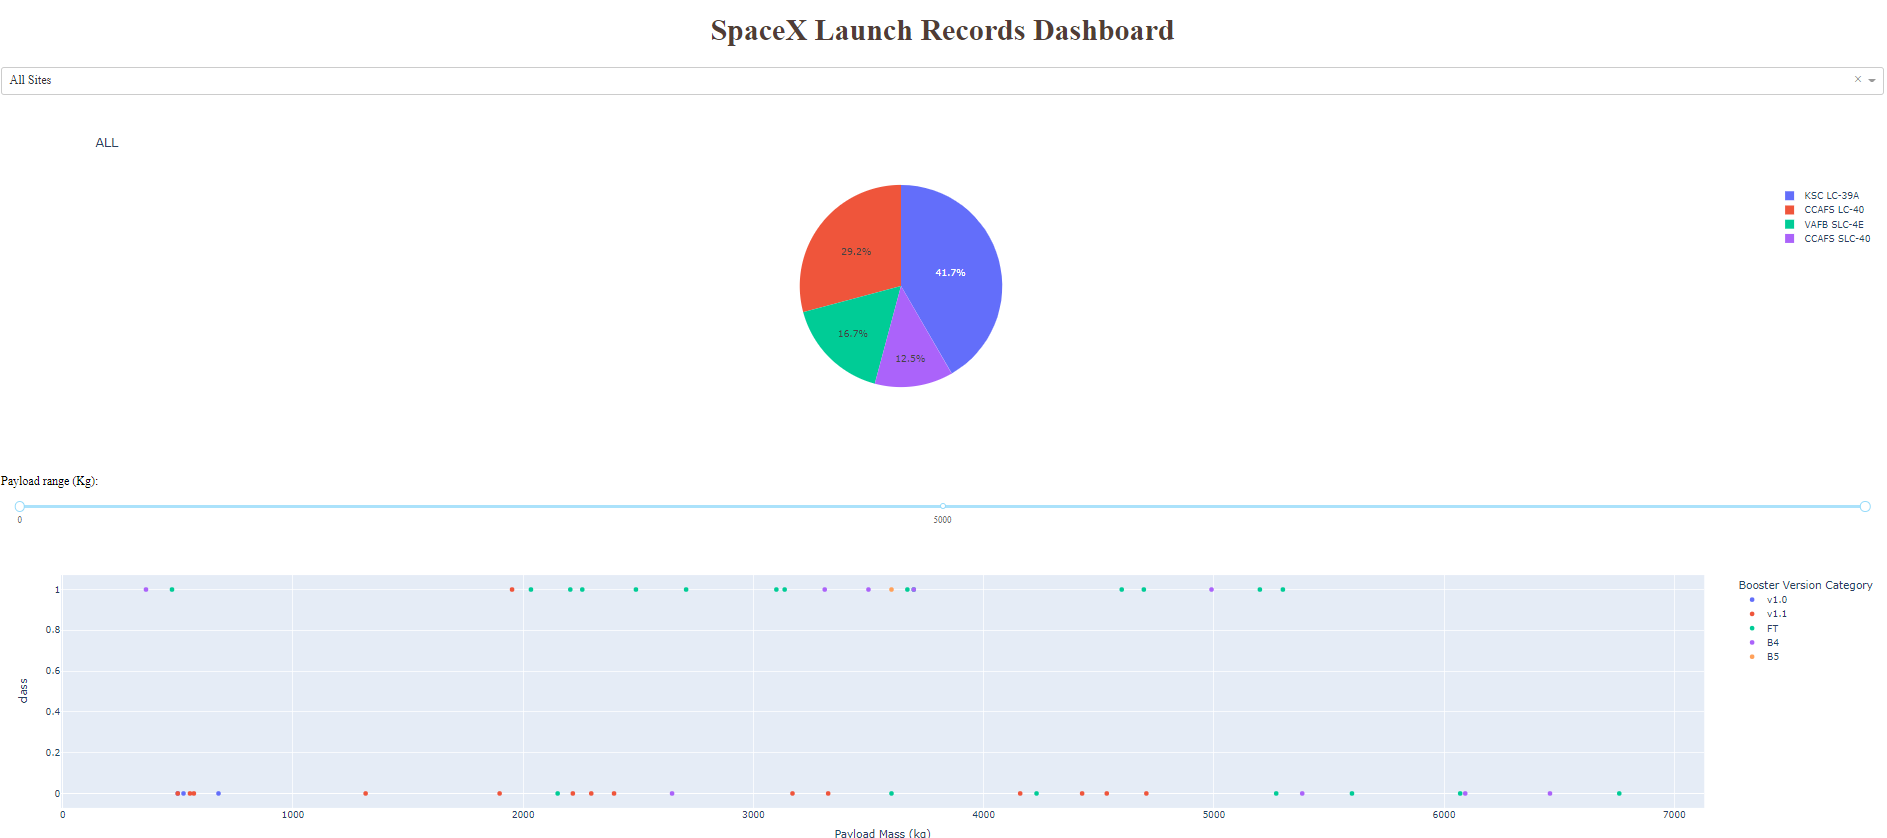

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("My_Image.png", width=1200, height=2000)

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
f = open('My_Image.png', 'wb')
f.write(streaming_body_1.read())

44412